# Problem 1: 

Suppose we have two classes A and B. 

1. The proportion of data points falling in class A is 0.5, and class B is 0.5. What is the Gini Index?
    
2. Compute the gini index when the proportion of data points falling in class A is 1, and class B is 0.

In [ ]:
def gini_index(probabilities):
    return 1 - sum(p**2 for p in probabilities)

gini_1 = gini_index([0.5, 0.5])
print(gini_1)

gini_2 = gini_index([1, 0])
print(gini_2)

The Gini Index that is a measure of impurity in a dataset was computed for two different class distributions. In the first case, where the proportions of class A and class B were equal (0.5 each), the Gini Index was 0.5, indicating moderate impurity. In the second case, where all data points belonged to class A (proportion 1) and none to class B (proportion 0), the Gini Index was 0, representing a perfectly pure dataset with no impurity.

# Problem 2: 

Which of the following statements about decision tree is true?

    A. Decision trees can handle both categorical and continuous features
    B. Decision trees can be used to solve both regression and classification problems
    C. Decision trees work very well with linear boundaries
    D. Decision trees tend to overfit the data.

In [ ]:
A, B, & D

# Problem 3: Pruning a decision tree

- In class, we saw how a single decision tree can overfit the data. Here we will see one way to avoid overfitting. 

- The tree fitting algorithm has several parameters, two of them of interest to us are the *max_depth* and *max_leaf_nodes*. 

- *max_depth* sets the maximum depth of the tree, and the *max_leaf_nodes* sets the maximum number of leaf nodes of the tree.

- By fixing these two parameters to a small value, we can prevent overfitting of the tree.

**Note:** this is the simplest way to avoid overfitting, there are more systematic ways such as cost complexity pruning. If you are interested, you can read more about it [here](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)


- The code below fits a tree to the iris dataset with default values of max_depth and max_leaf nodes.

- We use the training and testing method to compute the out of sample error,
i.e. we fit the tree to the training data and get the accuracy on the testing data.

In [39]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv("iris.csv")

We will use the Iris dataset, where the goal is to predict the "variety" of a flower based on its petal and sepal lengths and widths

In [41]:
# extract the features
X = iris.drop(columns = "variety")
y = iris['variety']

In [43]:
#split the data into training and testing. Use 33 percent for the test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
from sklearn import tree

In [47]:
# fit a tree with default option for max_depth and max_leaf_nodes. The default option is to place 
# no limits on these quantities
tree1 = tree.DecisionTreeClassifier(random_state=0, max_depth=None,
            max_features=None, max_leaf_nodes=None)

In [49]:
#Fit the tree on the training data
tree1 = tree1.fit(X_train, y_train)

In [35]:
# estimate the out of sample accuracy on the test data
tree1.score(X_test,y_test)

0.96

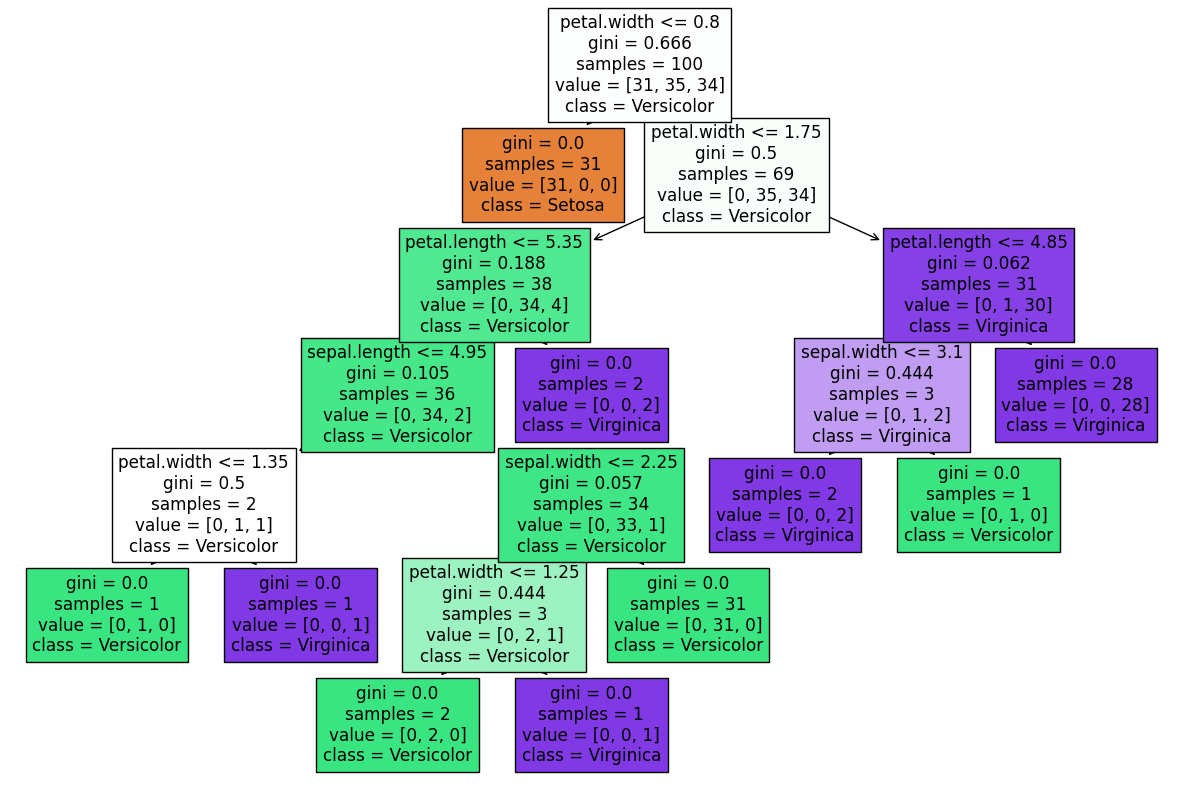

In [51]:
#plot the tree
fig = plt.figure(figsize=(15,10))
fig = tree.plot_tree(tree1, 
                   feature_names=iris.columns,  
                   class_names= tree1.classes_,
                   filled=True,
                    )
plt.show()

Now, your task is to repeat the process of fitting the tree to the training data and estimating the accuracy on the test data. But this time, use a max_depth of 3 and max_leaf_nodes  = 10. 
Make sure to use the same training and testing data that were created above (i.e. you dont need to do the splitting again).

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

tree2 = DecisionTreeClassifier(random_state=0, max_depth=3, max_leaf_nodes=10)
tree2.fit(X_train, y_train)

accuracy2 = tree2.score(X_test, y_test)

In [ ]:
# Estimte the testing error of the second tree. Compare it with the testing error of tree1. 
# What do ou find?

In [58]:
testing_error_tree1 = 1 - tree1.score(X_test, y_test)
testing_error_tree2 = 1 - tree2.score(X_test, y_test)

print(testing_error_tree1)
print(testing_error_tree2)

if testing_error_tree2 < testing_error_tree1:
    print("Tree2 has a lower testing error.")
elif testing_error_tree2 > testing_error_tree1:
    print("Tree1 has a lower testing error.")
else:
    print("Both trees have the same testing error.")

0.040000000000000036
0.020000000000000018
Tree2 has a lower testing error.


In [ ]:
#  plot the tree to compare the difference between the original tree and the current tree

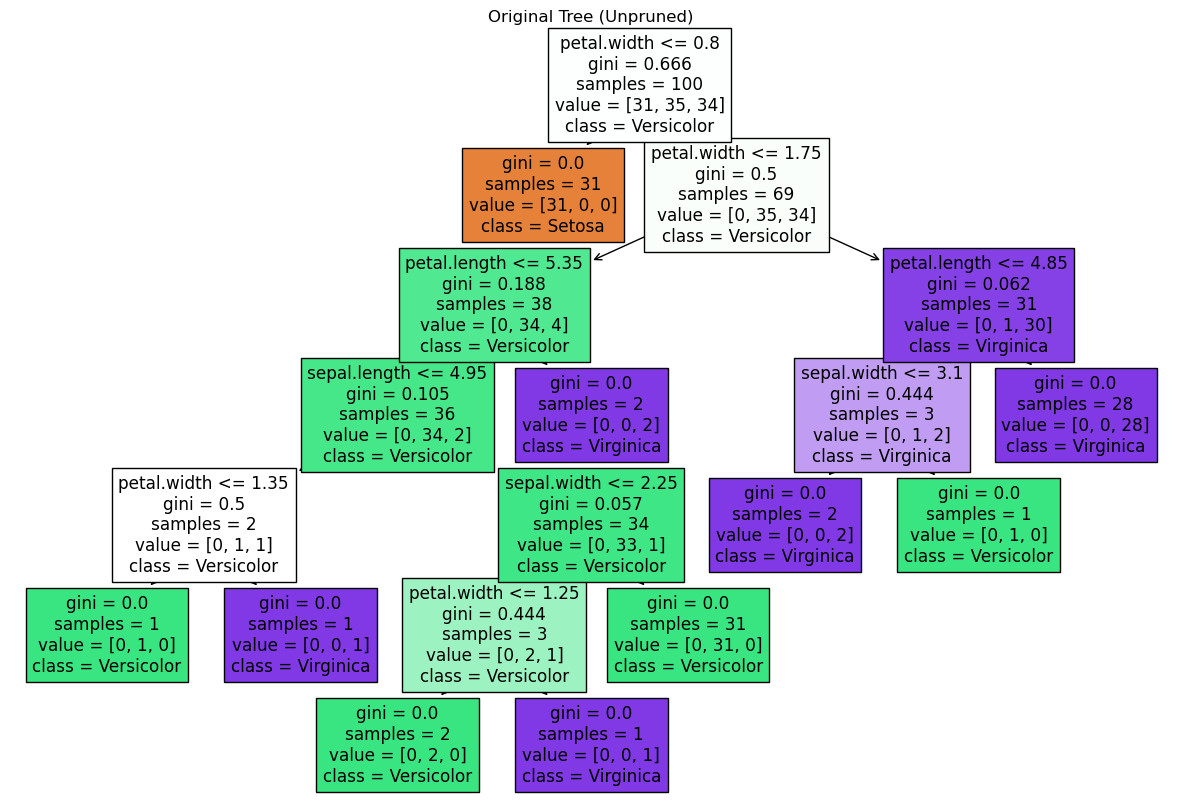

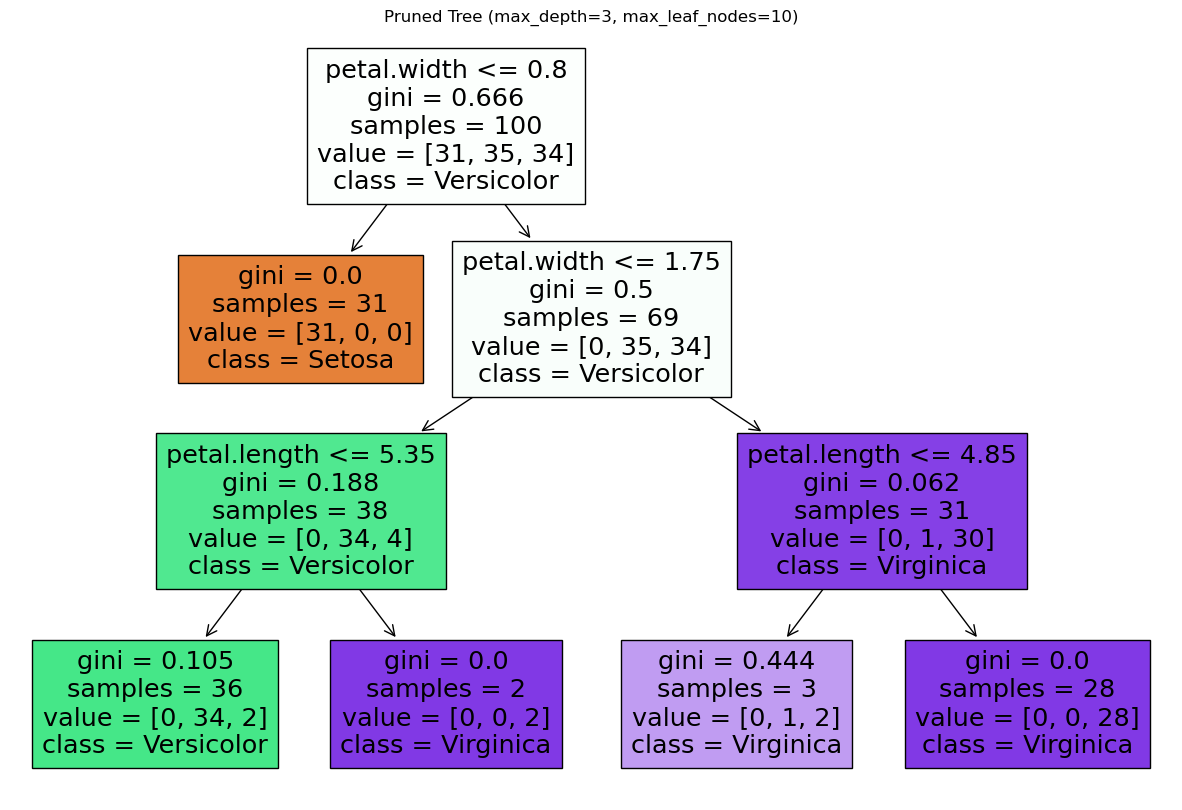

In [60]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(tree1, feature_names=X.columns, class_names=tree1.classes_, filled=True)
plt.title("Original Tree (Unpruned)")
plt.show()

plt.figure(figsize=(15, 10))
plot_tree(tree2, feature_names=X.columns, class_names=tree2.classes_, filled=True)
plt.title("Pruned Tree (max_depth=3, max_leaf_nodes=10)")
plt.show()

# Problem 4:

In this problem, we will be using the diabetes dataset of female Pima indians to predict the outcome of getting diabetes using bagging and random forests.

You can follow the steps in the "Random forerts, bagging in sklearn" lab that we did in class. 

Here's the outline:
1. Read the dataset, and extract the X and y variables ( the features and the outcome)
2. Split the dataset into training and testing
3. Fit the following three models on the training dataset and compute the accuracy on the testing dataset:

Model 1: A single tree

Model 2: A collection of 100 bagged trees

Model 3: A random forest with 100 bagged trees

Fill in the following table:


In [95]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [97]:

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Single Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
accuracy_tree = accuracy_score(y_test, tree.predict(X_test))
training_error_tree = 1 - accuracy_score(y_train, tree.predict(X_train))
testing_error_tree = 1 - accuracy_tree

# Model 2: Bagging with 100 trees
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
accuracy_bagging = accuracy_score(y_test, bagging.predict(X_test))
training_error_bagging = 1 - accuracy_score(y_train, bagging.predict(X_train))
testing_error_bagging = 1 - accuracy_bagging

# Model 3: Random Forest with 100 trees
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
accuracy_rf = accuracy_score(y_test, random_forest.predict(X_test))
training_error_rf = 1 - accuracy_score(y_train, random_forest.predict(X_train))
testing_error_rf = 1 - accuracy_rf

In [98]:
# Print results
print(f"Decision Tree - Training Error: {training_error_tree:.4f} | Testing Error: {testing_error_tree:.4f}")
print(f"Bagged Trees  - Training Error: {training_error_bagging:.4f} | Testing Error: {testing_error_bagging:.4f}")
print(f"Random Forest - Training Error: {training_error_rf:.4f} | Testing Error: {testing_error_rf:.4f}")

Decision Tree - Training Error: 0.0000 | Testing Error: 0.1250
Bagged Trees  - Training Error: 0.0000 | Testing Error: 0.1000
Random Forest - Training Error: 0.0000 | Testing Error: 0.1000


Also, as we did in the class, find out which variables are most important for predicting the probability of getting diabetes using the random forest model

Random Forest Accuracy: 0.7207792207792207


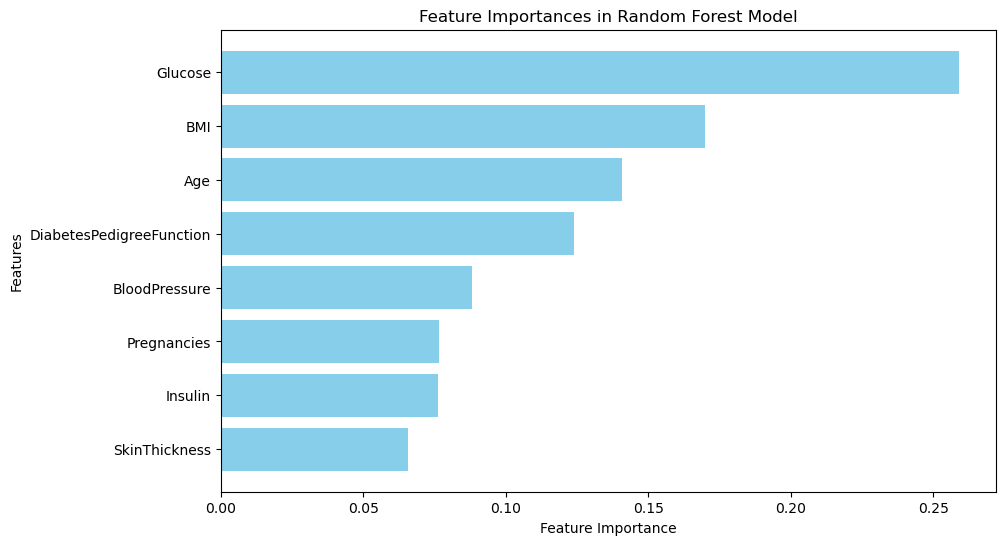

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = diabetes.drop(columns="Outcome")
y = diabetes["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

accuracy_rf = accuracy_score(y_test, random_forest.predict(X_test))
print("Random Forest Accuracy:", accuracy_rf)

feature_importances = random_forest.feature_importances_
feature_names = X.columns

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_features = np.array(feature_names)[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()